<a href="https://colab.research.google.com/github/Pavti7/DATA_Pawel_A/blob/main/Machine_Learning/Klasyfikacja/Projekt_klasyfikacja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Attrition - Machine Learning and choosing the best algorithm

In [ ]:
# All imports, maybe unnessesary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from xgboost import XGBClassifier

In [ ]:
# define functions we will use later on
def prepare_dataset(dataset_name):
    params = {'Df_no_out.csv': {'class_column': 'Attrition', 'index_col': 'EmployeeNumber'}}
    dataset, classes = load_dataset(dataset_name,
                                    **params[dataset_name])
    y = dataset.pop('class')
    X = dataset
    return X, y, classes

def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv(f'{filename}.csv', index_col=index_col)
    dataset['class'] = dataset[class_column].astype('category').cat.codes
    classes = dataset.pop(class_column).unique()
    return dataset, classes

def calculate_metric(target, prediction, average = 'weighted'):
    accuracy = round(accuracy_score(target, prediction),4)
    precision = round(precision_score(target, prediction, average = average),4)
    recall = round(recall_score(target, prediction, average = average),4)
    f_score = round(f1_score(target, prediction, average = average),4)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f_score, mislabeled, total

def print_results(metrics, classifier_id = 'classifier'):
    print(f'Result for {classifier_id}')
    print('----')
    print(f'Accuracy: {metrics[0]}')
    print(f'Precision: {metrics[1]}')
    print(f'Recall: {metrics[2]}')
    print(f'F1 Score: {metrics[3]}')
    print(f'Mislabeled: {metrics[4]} out of {metrics[5]}')
    print('\n')

In [ ]:
df = pd.read_csv('Df_no_out.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df = df.set_index('EmployeeNumber')
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,Yes,Male,Married,Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
104,30.0,1,852.0,0,1.0,1.0,0,4.0,55.0,2.0,...,10.0,8.0,3.0,0.0,0.0,61512.0,1,1,1,0
1638,38.0,1,397.0,0,2.0,2.0,1,4.0,54.0,2.0,...,5.0,4.0,0.0,2.0,0.0,93072.0,1,0,1,0
164,26.0,1,841.0,0,6.0,3.0,2,3.0,46.0,2.0,...,5.0,4.0,4.0,3.0,0.0,28416.0,0,0,1,0
395,28.0,1,1117.0,0,8.0,2.0,0,4.0,66.0,3.0,...,5.0,3.0,0.0,2.0,0.0,39720.0,0,0,0,1
53,35.0,1,464.0,0,4.0,2.0,2,3.0,75.0,3.0,...,1.0,0.0,0.0,0.0,0.0,23412.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7956,29.0,1,1210.0,1,2.0,3.0,1,1.0,78.0,2.0,...,0.0,0.0,0.0,0.0,1.0,79728.0,0,1,1,0
7957,29.0,1,1210.0,1,2.0,3.0,1,1.0,78.0,2.0,...,0.0,0.0,0.0,0.0,1.0,79728.0,0,1,1,0
7958,29.0,1,1210.0,1,2.0,3.0,1,1.0,78.0,2.0,...,0.0,0.0,0.0,0.0,1.0,79728.0,0,1,1,0


In [ ]:
# saving the data to predict for later 
to_pred = df[df.isna().any(axis=1)]
to_pred

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,Yes,Male,Married,Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
100000,35.0,1,1343.0,0,27.0,1.0,1,3.0,53.0,2.0,...,6.0,5.0,1.0,1.0,NaN,30708.0,0,0,0,1
100001,27.0,1,1220.0,0,5.0,3.0,0,3.0,85.0,3.0,...,4.0,3.0,1.0,2.0,NaN,29736.0,1,0,0,1
100002,24.0,1,1476.0,1,4.0,1.0,1,4.0,42.0,3.0,...,5.0,4.0,0.0,3.0,NaN,49944.0,1,0,1,0
100003,37.0,0,142.0,1,9.0,4.0,1,1.0,69.0,3.0,...,9.0,5.0,7.0,7.0,NaN,106008.0,0,1,0,0
100004,33.0,1,527.0,0,1.0,4.0,2,4.0,63.0,3.0,...,10.0,9.0,7.0,8.0,NaN,32232.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100142,35.0,0,208.0,0,8.0,4.0,0,3.0,52.0,3.0,...,14.0,11.0,2.0,9.0,NaN,49776.0,0,0,1,0
100143,41.0,1,582.0,0,28.0,4.0,0,1.0,60.0,2.0,...,20.0,7.0,0.0,10.0,NaN,162840.0,0,0,1,0
100144,42.0,1,1396.0,0,6.0,3.0,1,3.0,83.0,3.0,...,13.0,7.0,5.0,7.0,NaN,160176.0,0,1,1,0


In [ ]:
# now we can cut it out from the df
df = df.dropna()

In [ ]:
# now that we have a clean and prepared dataset, we can move on with the training and modeling
y = df.pop('Attrition')
X = df

In [ ]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome,Yes,Male,Married,Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
104,30.0,1,852.0,0,1.0,1.0,0,4.0,55.0,2.0,...,2.0,10.0,8.0,3.0,0.0,61512.0,1,1,1,0
1638,38.0,1,397.0,0,2.0,2.0,1,4.0,54.0,2.0,...,4.0,5.0,4.0,0.0,2.0,93072.0,1,0,1,0
164,26.0,1,841.0,0,6.0,3.0,2,3.0,46.0,2.0,...,2.0,5.0,4.0,4.0,3.0,28416.0,0,0,1,0
395,28.0,1,1117.0,0,8.0,2.0,0,4.0,66.0,3.0,...,3.0,5.0,3.0,0.0,2.0,39720.0,0,0,0,1
53,35.0,1,464.0,0,4.0,2.0,2,3.0,75.0,3.0,...,3.0,1.0,0.0,0.0,0.0,23412.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7956,29.0,1,1210.0,1,2.0,3.0,1,1.0,78.0,2.0,...,3.0,0.0,0.0,0.0,0.0,79728.0,0,1,1,0
7957,29.0,1,1210.0,1,2.0,3.0,1,1.0,78.0,2.0,...,3.0,0.0,0.0,0.0,0.0,79728.0,0,1,1,0
7958,29.0,1,1210.0,1,2.0,3.0,1,1.0,78.0,2.0,...,3.0,0.0,0.0,0.0,0.0,79728.0,0,1,1,0


In [ ]:
y

EmployeeNumber
104     0.0
1638    0.0
164     0.0
395     0.0
53      0.0
       ... 
7956    1.0
7957    1.0
7958    1.0
7962    1.0
7963    0.0
Name: Attrition, Length: 2351, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)
print(y_train.value_counts())
print(y_test.value_counts())

0.0    1085
1.0     678
Name: Attrition, dtype: int64
0.0    362
1.0    226
Name: Attrition, dtype: int64


What models do we have:
- Logistic regression
- KNN
- SVM (SVC)
- Naive Bayes
- Decision Tree
- XGBoostClassifier

In [ ]:
# # X normalized
Z = X.copy()
# # ['DailyRate', 'YearlyIncome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate']
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
minmaxscaler.fit(Z[['DailyRate', 'YearlyIncome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate']])
# X_scaled[['DailyRate', 'YearlyIncome', 'HourlyRate',
#           'MonthlyIncome', 'MonthlyRate']]= minmaxscaler.transform(X[['DailyRate', 
#                                                                       'YearlyIncome', 'HourlyRate', 
#                                                                       'MonthlyIncome', 'MonthlyRate']].values)


Z[['DailyRate', 'YearlyIncome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate']] = minmaxscaler.transform(Z[['DailyRate', 'YearlyIncome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate']].values)
Z

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome,Yes,Male,Married,Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
104,30.0,1,0.537249,0,1.0,1.0,0,4.0,0.357143,2.0,...,2.0,10.0,8.0,3.0,0.0,0.216798,1,1,1,0
1638,38.0,1,0.211318,0,2.0,2.0,1,4.0,0.342857,2.0,...,4.0,5.0,4.0,0.0,2.0,0.355292,1,0,1,0
164,26.0,1,0.529370,0,6.0,3.0,2,3.0,0.228571,2.0,...,2.0,5.0,4.0,4.0,3.0,0.071564,0,0,1,0
395,28.0,1,0.727077,0,8.0,2.0,0,4.0,0.514286,3.0,...,3.0,5.0,3.0,0.0,2.0,0.121169,0,0,0,1
53,35.0,1,0.259312,0,4.0,2.0,2,3.0,0.642857,3.0,...,3.0,1.0,0.0,0.0,0.0,0.049605,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7956,29.0,1,0.793696,1,2.0,3.0,1,1.0,0.685714,2.0,...,3.0,0.0,0.0,0.0,0.0,0.296735,0,1,1,0
7957,29.0,1,0.793696,1,2.0,3.0,1,1.0,0.685714,2.0,...,3.0,0.0,0.0,0.0,0.0,0.296735,0,1,1,0
7958,29.0,1,0.793696,1,2.0,3.0,1,1.0,0.685714,2.0,...,3.0,0.0,0.0,0.0,0.0,0.296735,0,1,1,0


In [ ]:
Z_train, Z_test, a_train, a_test = train_test_split(Z,y, stratify = y)
print(a_train.value_counts())
print(a_test.value_counts())

0.0    1085
1.0     678
Name: Attrition, dtype: int64
0.0    362
1.0    226
Name: Attrition, dtype: int64


## Logistic regression

In [ ]:
LR = LogisticRegression(random_state=30, max_iter = 500)
LR.fit(Z_train, a_train)

LogisticRegression(max_iter=500, random_state=30)

In [ ]:
y_pred_LR = LR.predict(Z_test)
y_pred_train_LR = LR.predict(Z_train)

In [ ]:
# przez predict_proba zrobić prawdopodobieństwo odejścia
y_pred_proba = LR.predict_proba(Z_test)
y_pred_proba_train = LR.predict_proba(Z_train)
y_pred_proba

array([[0.64580389, 0.35419611],
       [0.47101746, 0.52898254],
       [0.75854129, 0.24145871],
       ...,
       [0.48157804, 0.51842196],
       [0.61587377, 0.38412623],
       [0.64203379, 0.35796621]])

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, treshold = roc_curve(a_test, y_pred_proba[:,1], drop_intermediate=False)
fpr_t, tpr_t, treshold_t = roc_curve(a_train, y_pred_proba_train[:,1], drop_intermediate=False)

<ipython-input-49-d8545f3b88b7>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,1], [0,1], 'k--', c ='black')


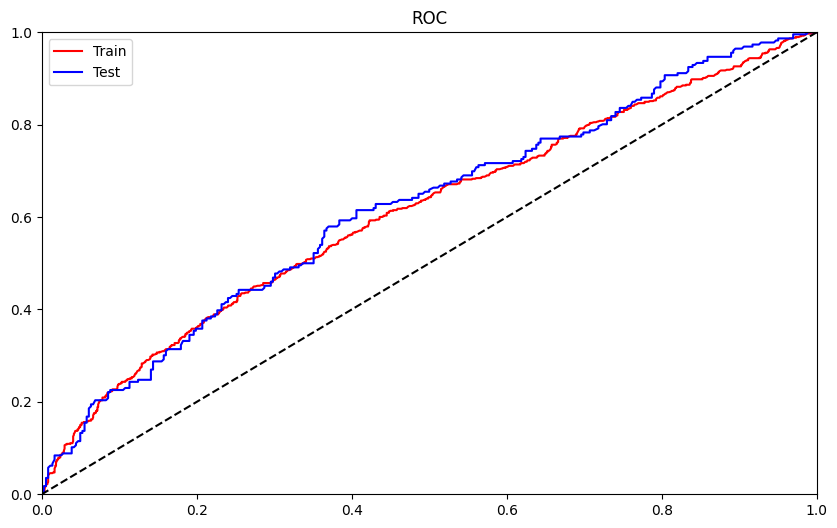

In [ ]:
import matplotlib.pyplot as plt

def plot_roc(fpr_t, tpr_t, fpr, tpr):
    plt.figure(figsize = (10,6))
    plt.plot(fpr_t, tpr_t, c = 'red', label = 'Train')
    plt.plot(fpr, tpr, c = 'blue', label = 'Test')
    plt.axis([0,1,0,1])
    plt.plot([0,1], [0,1], 'k--', c ='black')
    plt.title('ROC')
    plt.legend()
    
plot_roc(fpr_t, tpr_t, fpr, tpr)    

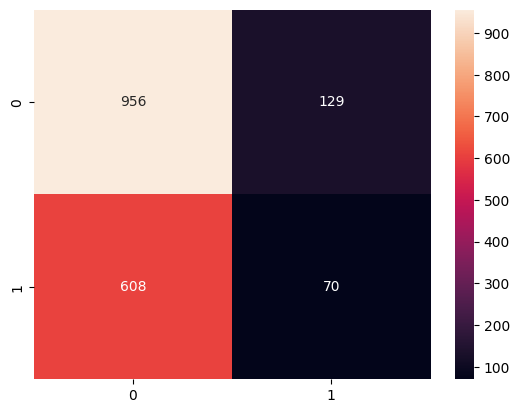

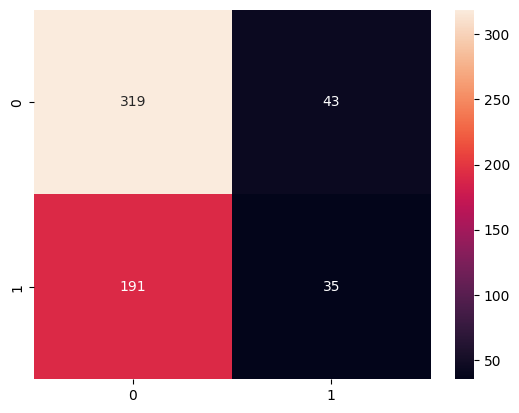

In [ ]:
cm = confusion_matrix(y_test, y_pred_LR)
cm_train = confusion_matrix(y_train, y_pred_train_LR)

sns.heatmap(cm_train, annot = True, fmt = 'd')
plt.show()

sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

In [ ]:
scores = cross_validate(LR, X_train, y_train, scoring = ['recall_macro'], cv = 2)

In [ ]:
print_results(calculate_metric(y_test, y_pred_LR))

Result for classifier
----
Accuracy: 0.602
Precision: 0.5575
Recall: 0.602
F1 Score: 0.5389
Mislabeled: 234 out of 588




## KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10, metric = 'euclidean')
knn.fit(Z_train, a_train)

y_pred_KNN = knn.predict(Z_test)

In [ ]:
print_results(calculate_metric(a_test, y_pred_KNN), classifier_id = 'KNN Euclidean')

Result for KNN Euclidean
----
Accuracy: 0.5697
Precision: 0.5089
Recall: 0.5697
F1 Score: 0.5104
Mislabeled: 253 out of 588




In [ ]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid_KNN = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

# fitting the model for grid search
grid_search_KNN=grid_KNN.fit(Z_train, a_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


## SVM

In [ ]:
# Train a linear SVM
svm = SVC(C = 0.1, kernel="linear")
svm.fit(Z_train,a_train)
y_pred_train_SVC = svm.predict(Z_train)
y_pred_SVC = svm.predict(Z_test)

In [ ]:
print(confusion_matrix(a_train, y_pred_train_SVC),'\n')
print(confusion_matrix(a_test, y_pred_SVC))

[[1085    0]
 [ 678    0]] 

[[362   0]
 [226   0]]


In [ ]:
svm = SVC()
svm.fit(X_train,y_train)

parameters = [{'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10]},
              {'kernel': ['poly', 'rbf'], 'C': [0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto']}]

searcher = GridSearchCV(svm, parameters, cv = 3, scoring = 'f1_weighted')
searcher.fit(X_train, y_train)

print("Best CV params", searcher.best_params_)
print("Best CV scores", searcher.best_score_)

## Naive Bayes

In [ ]:
X_minmax = X.copy()

minmax.fit(X)
X_matrix = minmax.transform(X)

X_minmax[:] = X_matrix

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

for classifier in [MultinomialNB(), GaussianNB(), BernoulliNB()]:

    classifier.fit(Z_train, a_train)
    y_pred_NB = classifier.predict(Z_test)

    print_results(calculate_metric(a_test, y_pred_NB), classifier_id = str(classifier))

Result for MultinomialNB()
----
Accuracy: 0.5901
Precision: 0.5838
Recall: 0.5901
F1 Score: 0.5864
Mislabeled: 241 out of 588


Result for GaussianNB()
----
Accuracy: 0.6156
Precision: 0.6011
Recall: 0.6156
F1 Score: 0.6035
Mislabeled: 226 out of 588


Result for BernoulliNB()
----
Accuracy: 0.631
Precision: 0.6087
Recall: 0.631
F1 Score: 0.5864
Mislabeled: 217 out of 588




## Decision Tree

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
DecTree=DecisionTreeClassifier(criterion = 'entropy')
res_GSLOO=GridSearchCV(DecTree,
                       param_grid={'max_depth':range(1,10),
                                   'min_samples_split':range(10,60,10)},
                       cv=3,
                       scoring='neg_mean_absolute_error')
res_GSLOO.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_split': range(10, 60, 10)},
             scoring='neg_mean_absolute_error')

In [ ]:
y_pred_train_DT = res_GSLOO.predict(X_train)
y_pred_DT = res_GSLOO.predict(X_test)

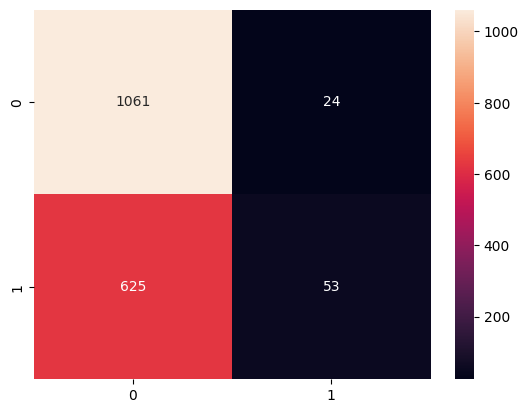

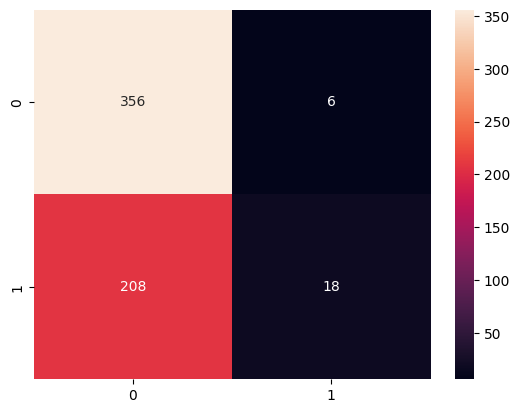

In [ ]:
cm = confusion_matrix(y_test, y_pred_DT)
cm_train = confusion_matrix(y_train, y_pred_train_DT)

sns.heatmap(cm_train, annot = True, fmt = 'd')
plt.show()

sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

In [ ]:
print_results(calculate_metric(a_test, y_pred_DT), classifier_id = res_GSLOO)

Result for GridSearchCV(cv=3, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_split': range(10, 60, 10)},
             scoring='neg_mean_absolute_error')
----
Accuracy: 0.6088
Precision: 0.54
Recall: 0.6088
F1 Score: 0.4935
Mislabeled: 230 out of 588




## XGBoostClassifier

## Random forest

In [ ]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_train_RF = RF.predict(X_train)
y_pred_RF = RF.predict(X_test)

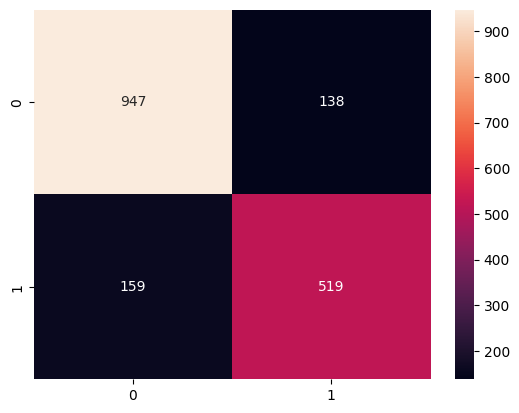

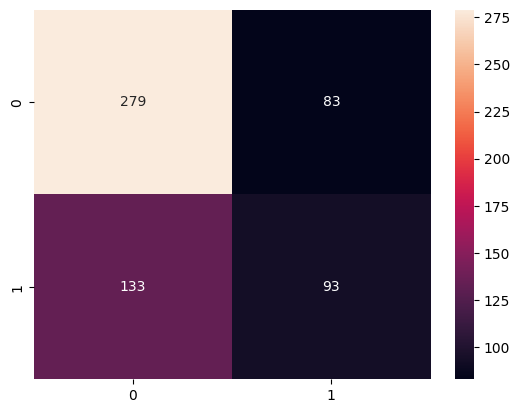

In [ ]:
cm = confusion_matrix(y_test, y_pred_RF)
cm_train = confusion_matrix(y_train, y_pred_train_RF)

sns.heatmap(cm_train, annot = True, fmt = 'd')
plt.show()

sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

In [ ]:
print_results(calculate_metric(a_test, y_pred_RF), classifier_id = RF)

Result for RandomForestClassifier()
----
Accuracy: 0.5374
Precision: 0.517
Recall: 0.5374
F1 Score: 0.5236
Mislabeled: 272 out of 588


